# Predicting Customer Churn in a Telecom Company

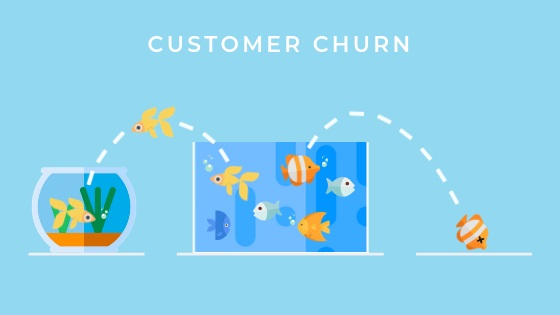

# Telecom Customer Churn

# What Do youmean by Churn for Customer ?

In [1]:
# For reading the files
import numpy as np
import pandas as pd

# For visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# For feature engineering, model training, and predicting
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV

# To ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the CSV file
train_df= pd.read_csv('train.csv')
train_df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#Shape of data
train_df.shape

(7043, 21)

In [4]:
#Checking the columns
train_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

The graph shows the distribution of customers across different services offered by a Telecom company


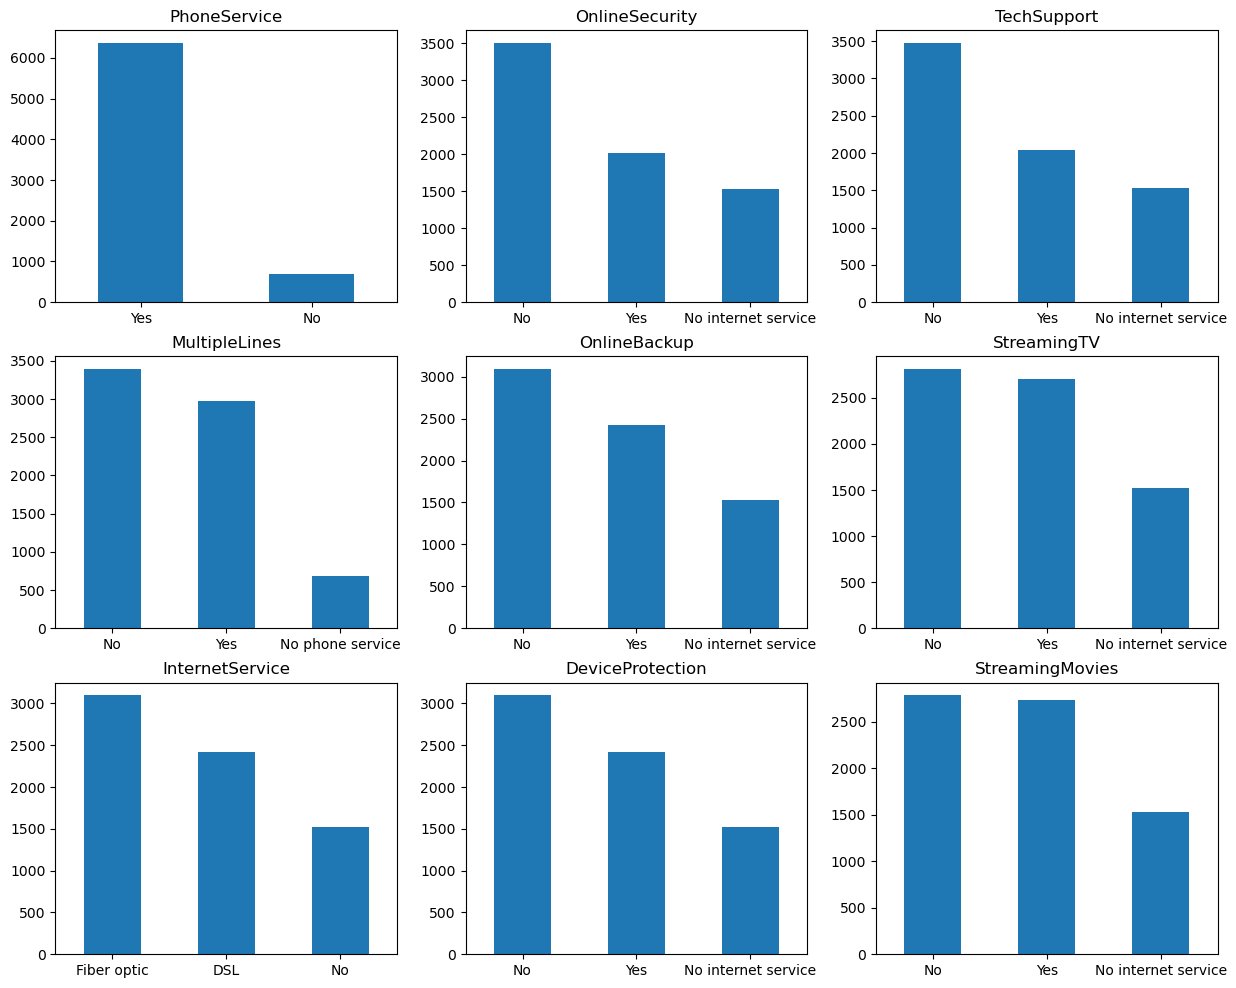

In [5]:
#Plotting a graph for service variables
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = train_df[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
        
    elif i >=3 and i < 6:
        ax = train_df[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)
        
    elif i < 9:
        ax = train_df[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(item)
print('The graph shows the distribution of customers across different services offered by a Telecom company')

 ##The graph shows the distribution of customers across different services offered by a Telecom company

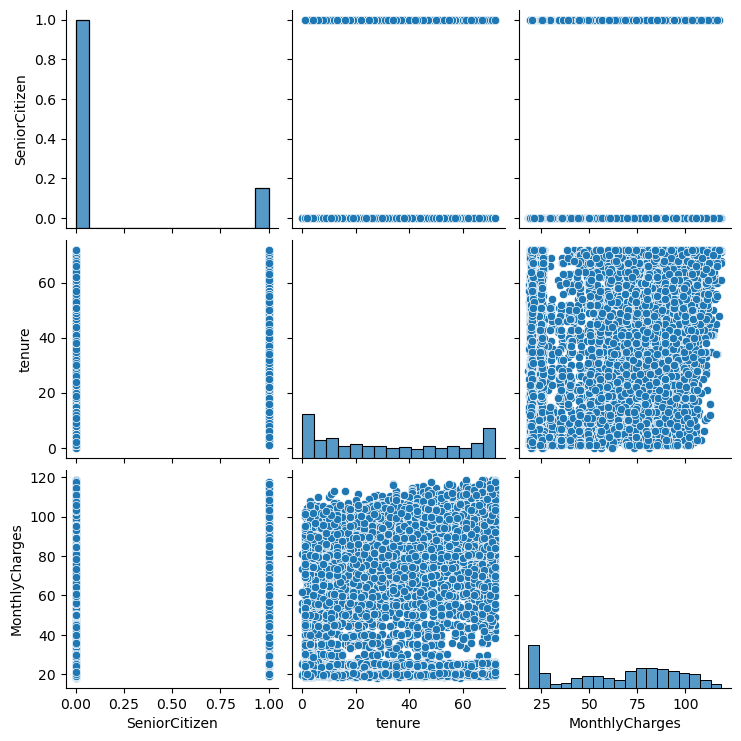

In [6]:
#pairplot 
sns.pairplot(train_df)

In [7]:
#Dropping customerID
train_df=train_df.drop('customerID', axis=1)

In [9]:
#Displaying top 5 rows
train_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
#Function to print the overview of the data
def dataoveriew(train_df, message):
    print(f'{message}:\n')
    print("Rows:", train_df.shape[0])
    print("\nNumber of features:", train_df.shape[1])
    print("\nFeatures:")
    print(train_df.columns.tolist())
    print("\nMissing values:", train_df.isnull().sum().values.sum())
    print("\nUnique values:")
    print(train_df.nunique())

In [11]:
dataoveriew(train_df, 'Overiew of the training dataset')

Overiew of the training dataset:

Rows: 7043

Number of features: 20

Features:
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Missing values: 0

Unique values:
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [13]:
train_df.shape

(7043, 20)

In [14]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


<Axes: >

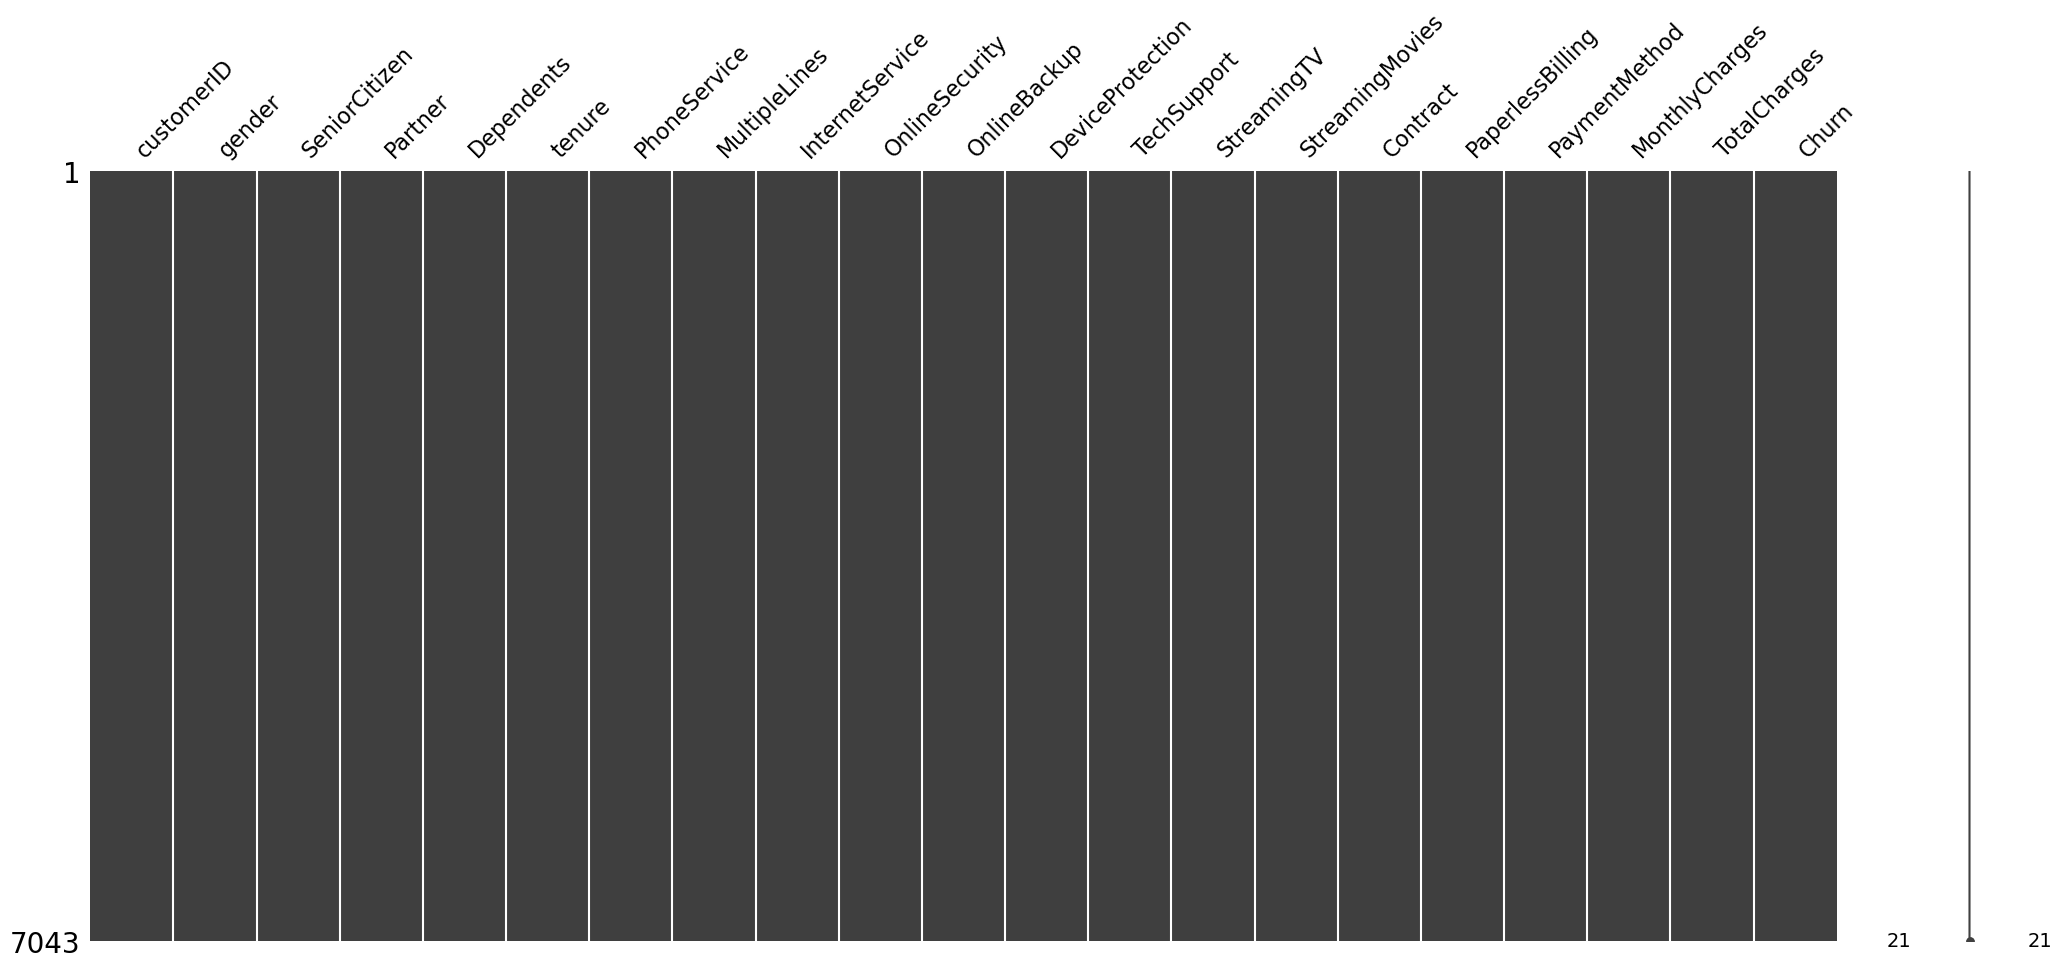

In [15]:
#Using missingno to plot the graph for missing data
import missingno as msno
df = pd.read_csv('train.csv')
msno.matrix(df)

In [16]:
#Checking info
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


Text(0.5, 1.02, 'Count of TARGET Variable per category')

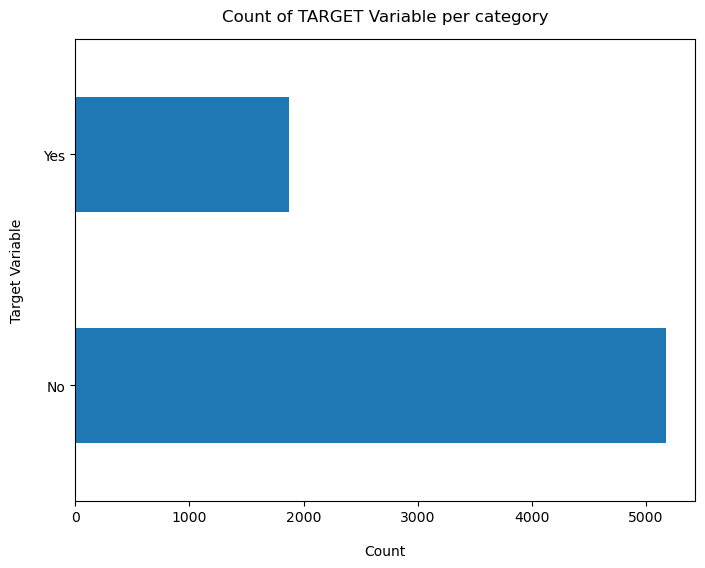

In [17]:
#Plotting grap for churn data
train_df['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02)

In [18]:

100*train_df['Churn'].value_counts()/len(train_df['Churn'])

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

In [19]:
#Count of Churn values
train_df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [20]:
#Correlation
train_df.corr()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


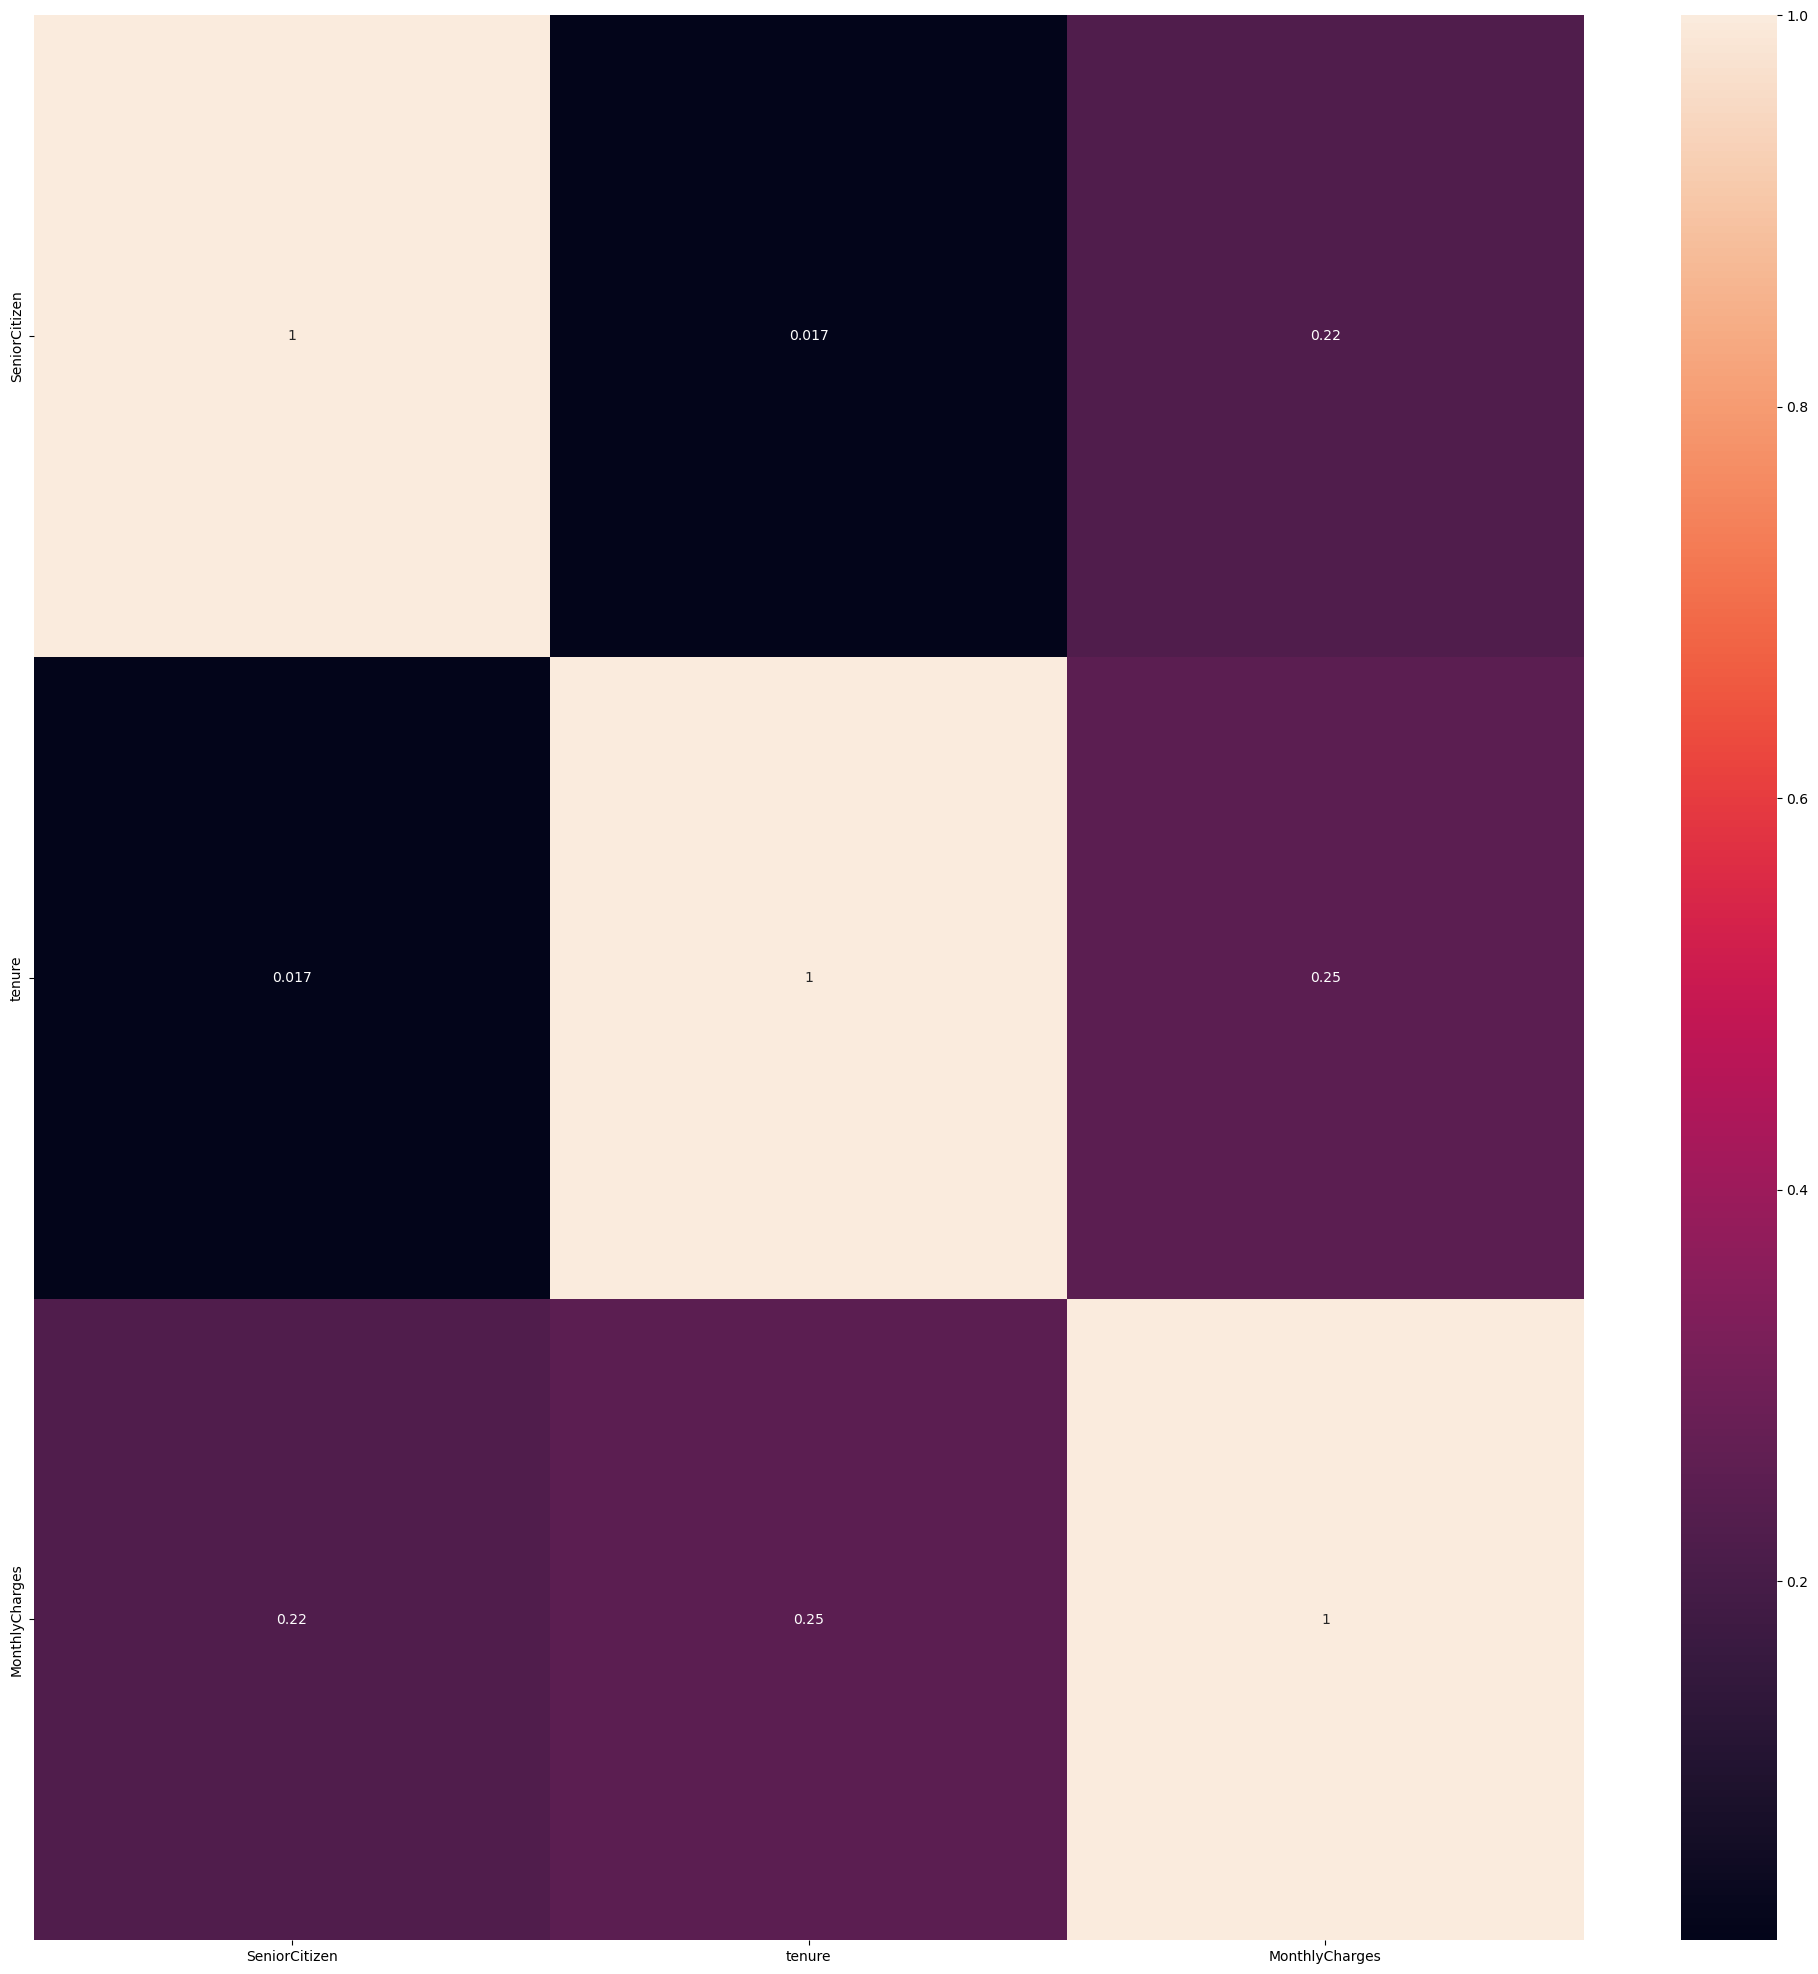

In [21]:
#Displaying Heatmap
plt.figure(figsize=(25,25))

# CORRELATION
sns.heatmap(train_df.corr(),annot=True)
plt.show()

In [23]:
# Total charge is an object type so converting it into numeric form

train_df['TotalCharges'] = pd.to_numeric(train_df['TotalCharges'], errors='coerce')

# check the data type of the column after conversion
print(train_df['TotalCharges'].dtype)

float64


In [24]:
#finding sum of na values
train_df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [25]:
# Checking if there is any na value after coercing in the previous step
train_df['TotalCharges'].isnull().sum()
mask = train_df['TotalCharges'].isna()

In [26]:
# Filling the missing data with median
median = train_df["TotalCharges"].median()
train_df["TotalCharges"].fillna(median, inplace=True)

In [27]:
train_df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<Axes: xlabel='tenure', ylabel='TotalCharges'>

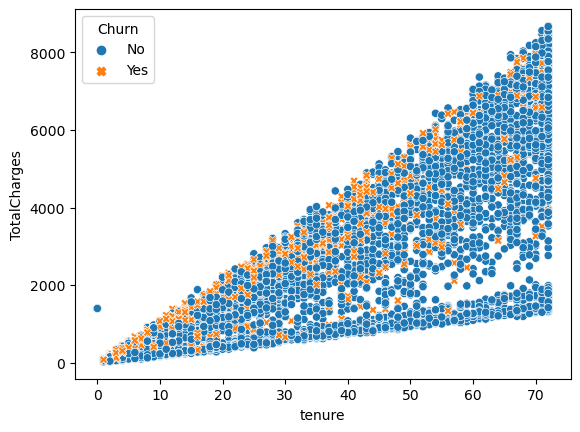

In [28]:
#Scatterplot for tenure nd TotalCharges
sns.scatterplot(data=train_df,x="tenure",y="TotalCharges",hue="Churn",style="Churn")

OBSERVATION: We can see that Tenure increases with increase in TotalCharge

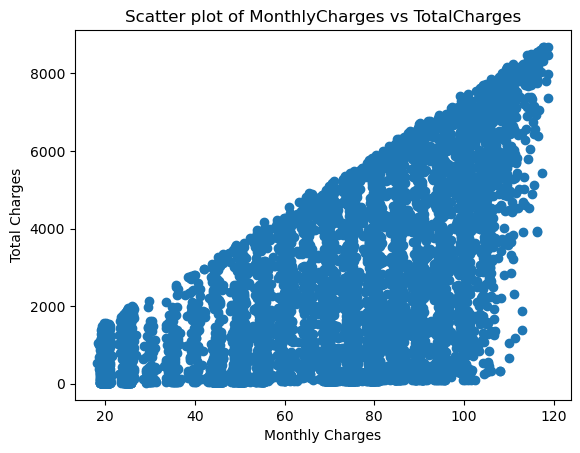

In [29]:
import matplotlib.pyplot as plt

# Create a scatter plot of MonthlyCharges vs TotalCharges
plt.scatter(train_df['MonthlyCharges'], train_df['TotalCharges'])
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.title('Scatter plot of MonthlyCharges vs TotalCharges')
plt.show()


OBSERVATION: We can see that Monthly Charges with increase in TotalCharge

In [30]:
#percentage of nullvalues
(train_df.isnull().sum()/len(train_df)*100)

gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

In [31]:
#Printing categorical and numerical data
print('Categorical Features ')
print(train_df.select_dtypes(['object']).columns)

print('Numeric Features')
print(train_df.select_dtypes(['int64','float64']).columns)

Categorical Features 
Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')
Numeric Features
Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')


In [34]:
# Checking how many categories each feature has
for d in train_df.columns:
    if d != "TotalCharges" and d != "MonthlyCharges" and d != "Dependents":
        print(train_df[d].value_counts())

Male      3555
Female    3488
Name: gender, dtype: int64
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
No                     3473
Yes                    2044
No internet s

In [35]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns
cat_cols = ['gender', 'PaymentMethod', 'PaperlessBilling', 'Contract', 'StreamingMovies', 'StreamingTV', 'TechSupport', 'DeviceProtection', 'OnlineBackup', 'OnlineSecurity', 'MultipleLines', 'Churn', 'InternetService', 'PhoneService', 'Dependents', 'Partner']

# Apply LabelEncoder to each column
for col in cat_cols:
    train_df[col] = LabelEncoder().fit_transform(train_df[col])


In [38]:
# Checking the data type after data transformation
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int32  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int32  
 3   Dependents        7043 non-null   int32  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int32  
 6   MultipleLines     7043 non-null   int32  
 7   InternetService   7043 non-null   int32  
 8   OnlineSecurity    7043 non-null   int32  
 9   OnlineBackup      7043 non-null   int32  
 10  DeviceProtection  7043 non-null   int32  
 11  TechSupport       7043 non-null   int32  
 12  StreamingTV       7043 non-null   int32  
 13  StreamingMovies   7043 non-null   int32  
 14  Contract          7043 non-null   int32  
 15  PaperlessBilling  7043 non-null   int32  
 16  PaymentMethod     7043 non-null   int32  


In [39]:
train_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [40]:
train_df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

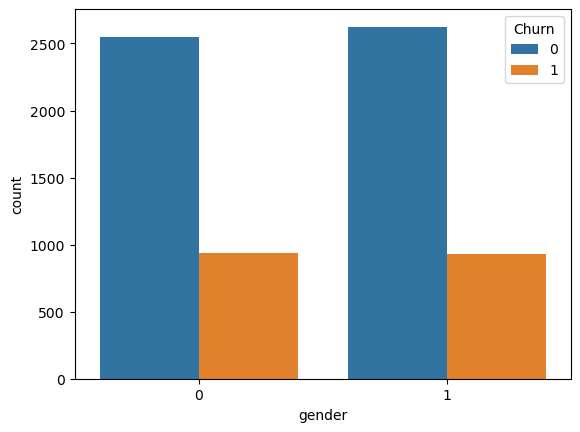

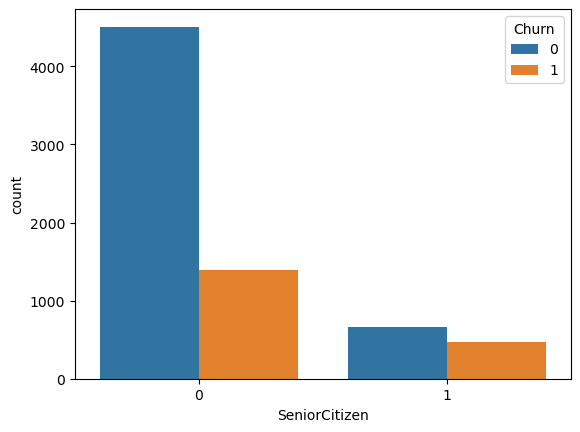

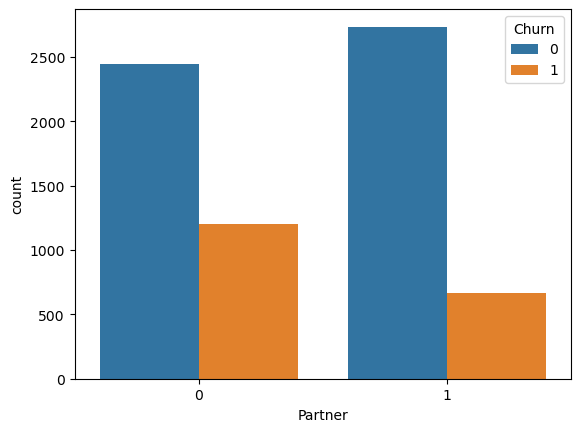

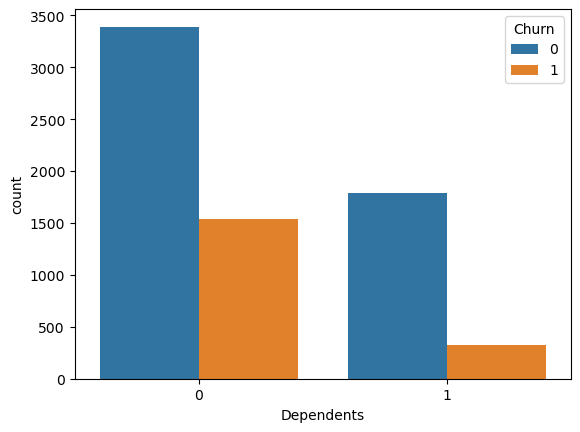

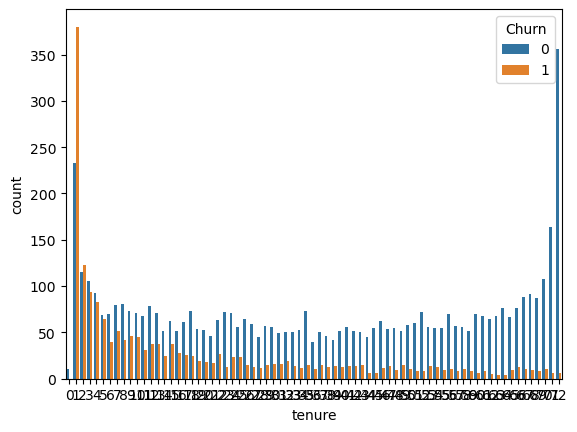

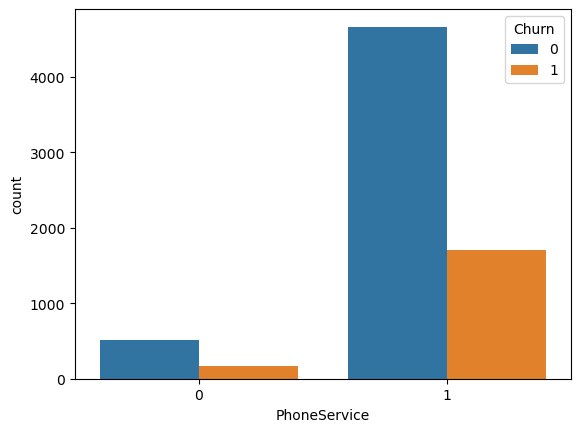

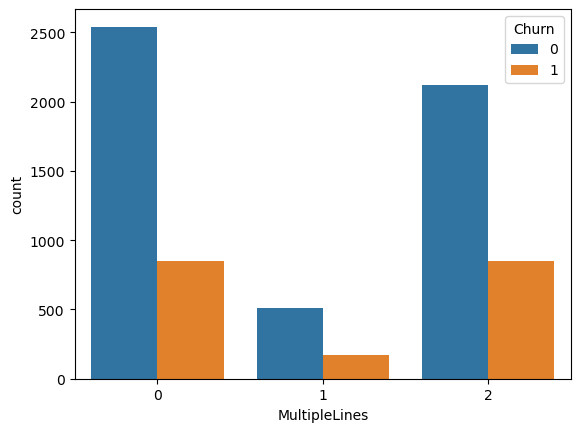

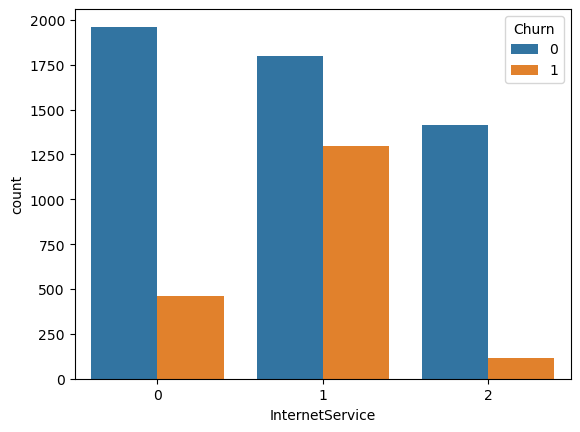

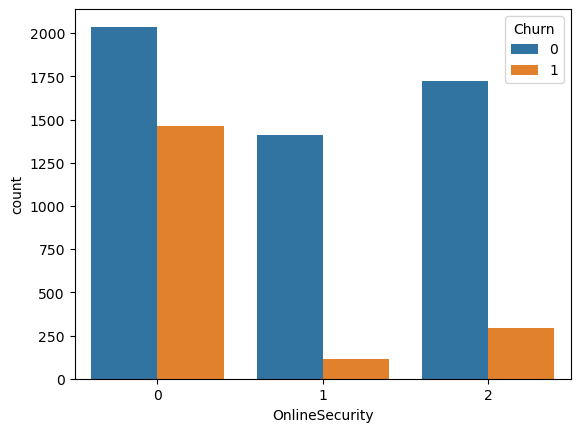

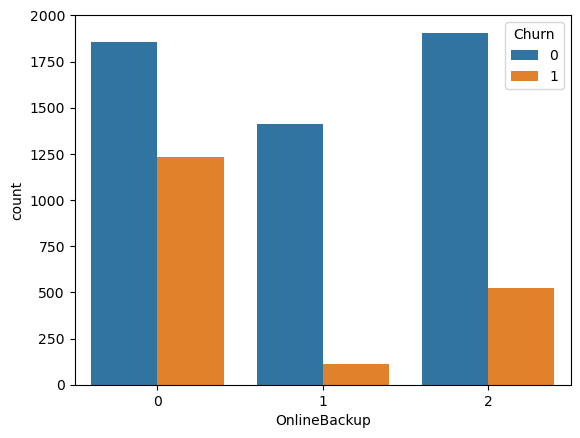

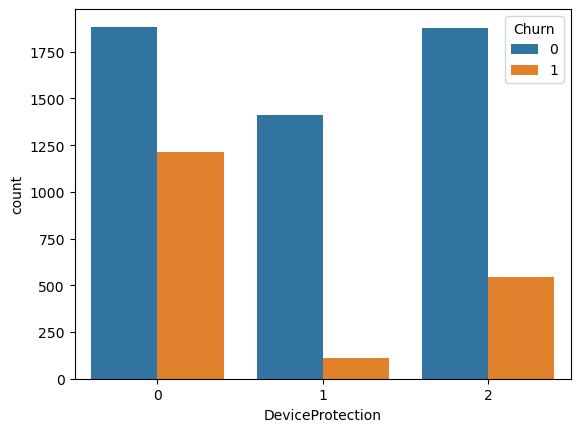

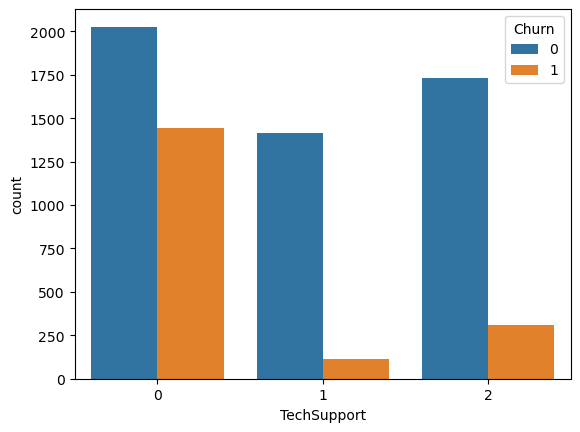

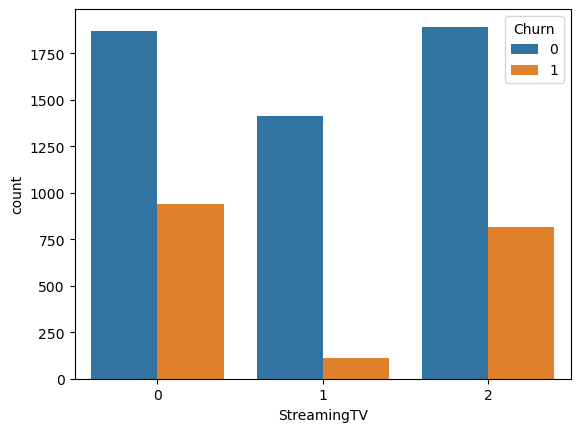

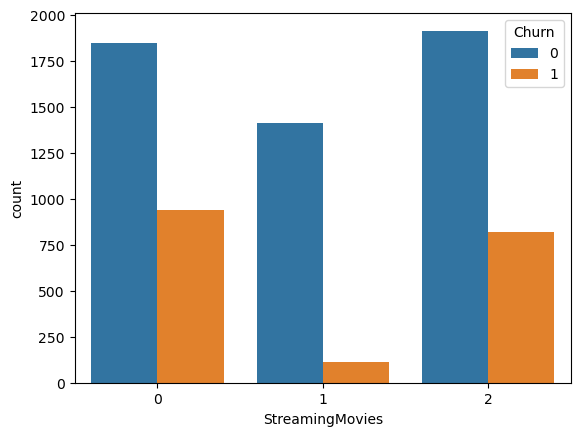

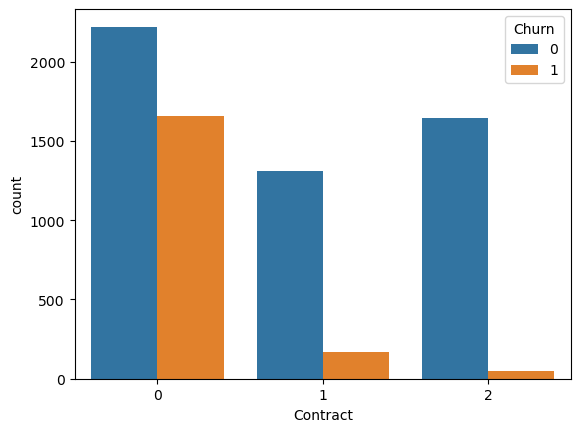

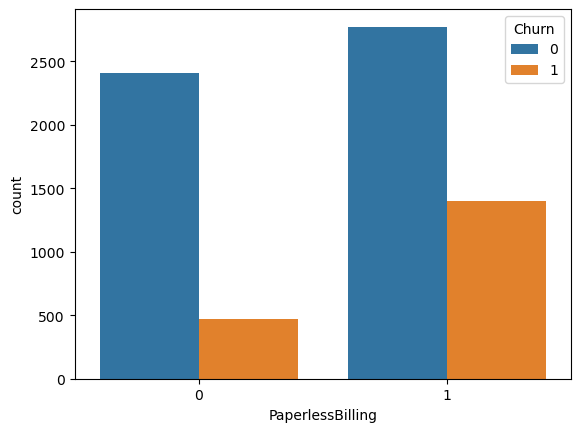

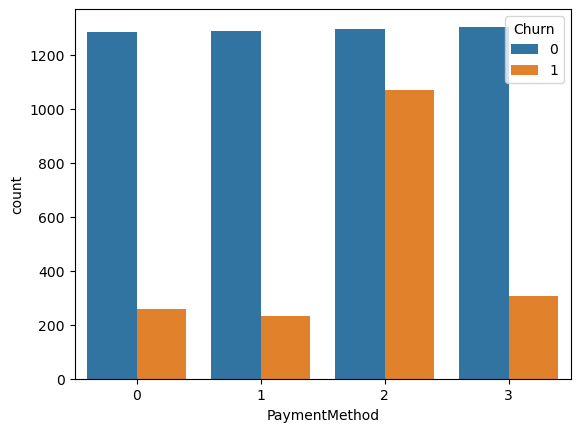

In [41]:
# count plot for each predictor variable in the training dataset with target variable Churn
for i, predictor in enumerate(train_df.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=train_df, x=predictor, hue='Churn')

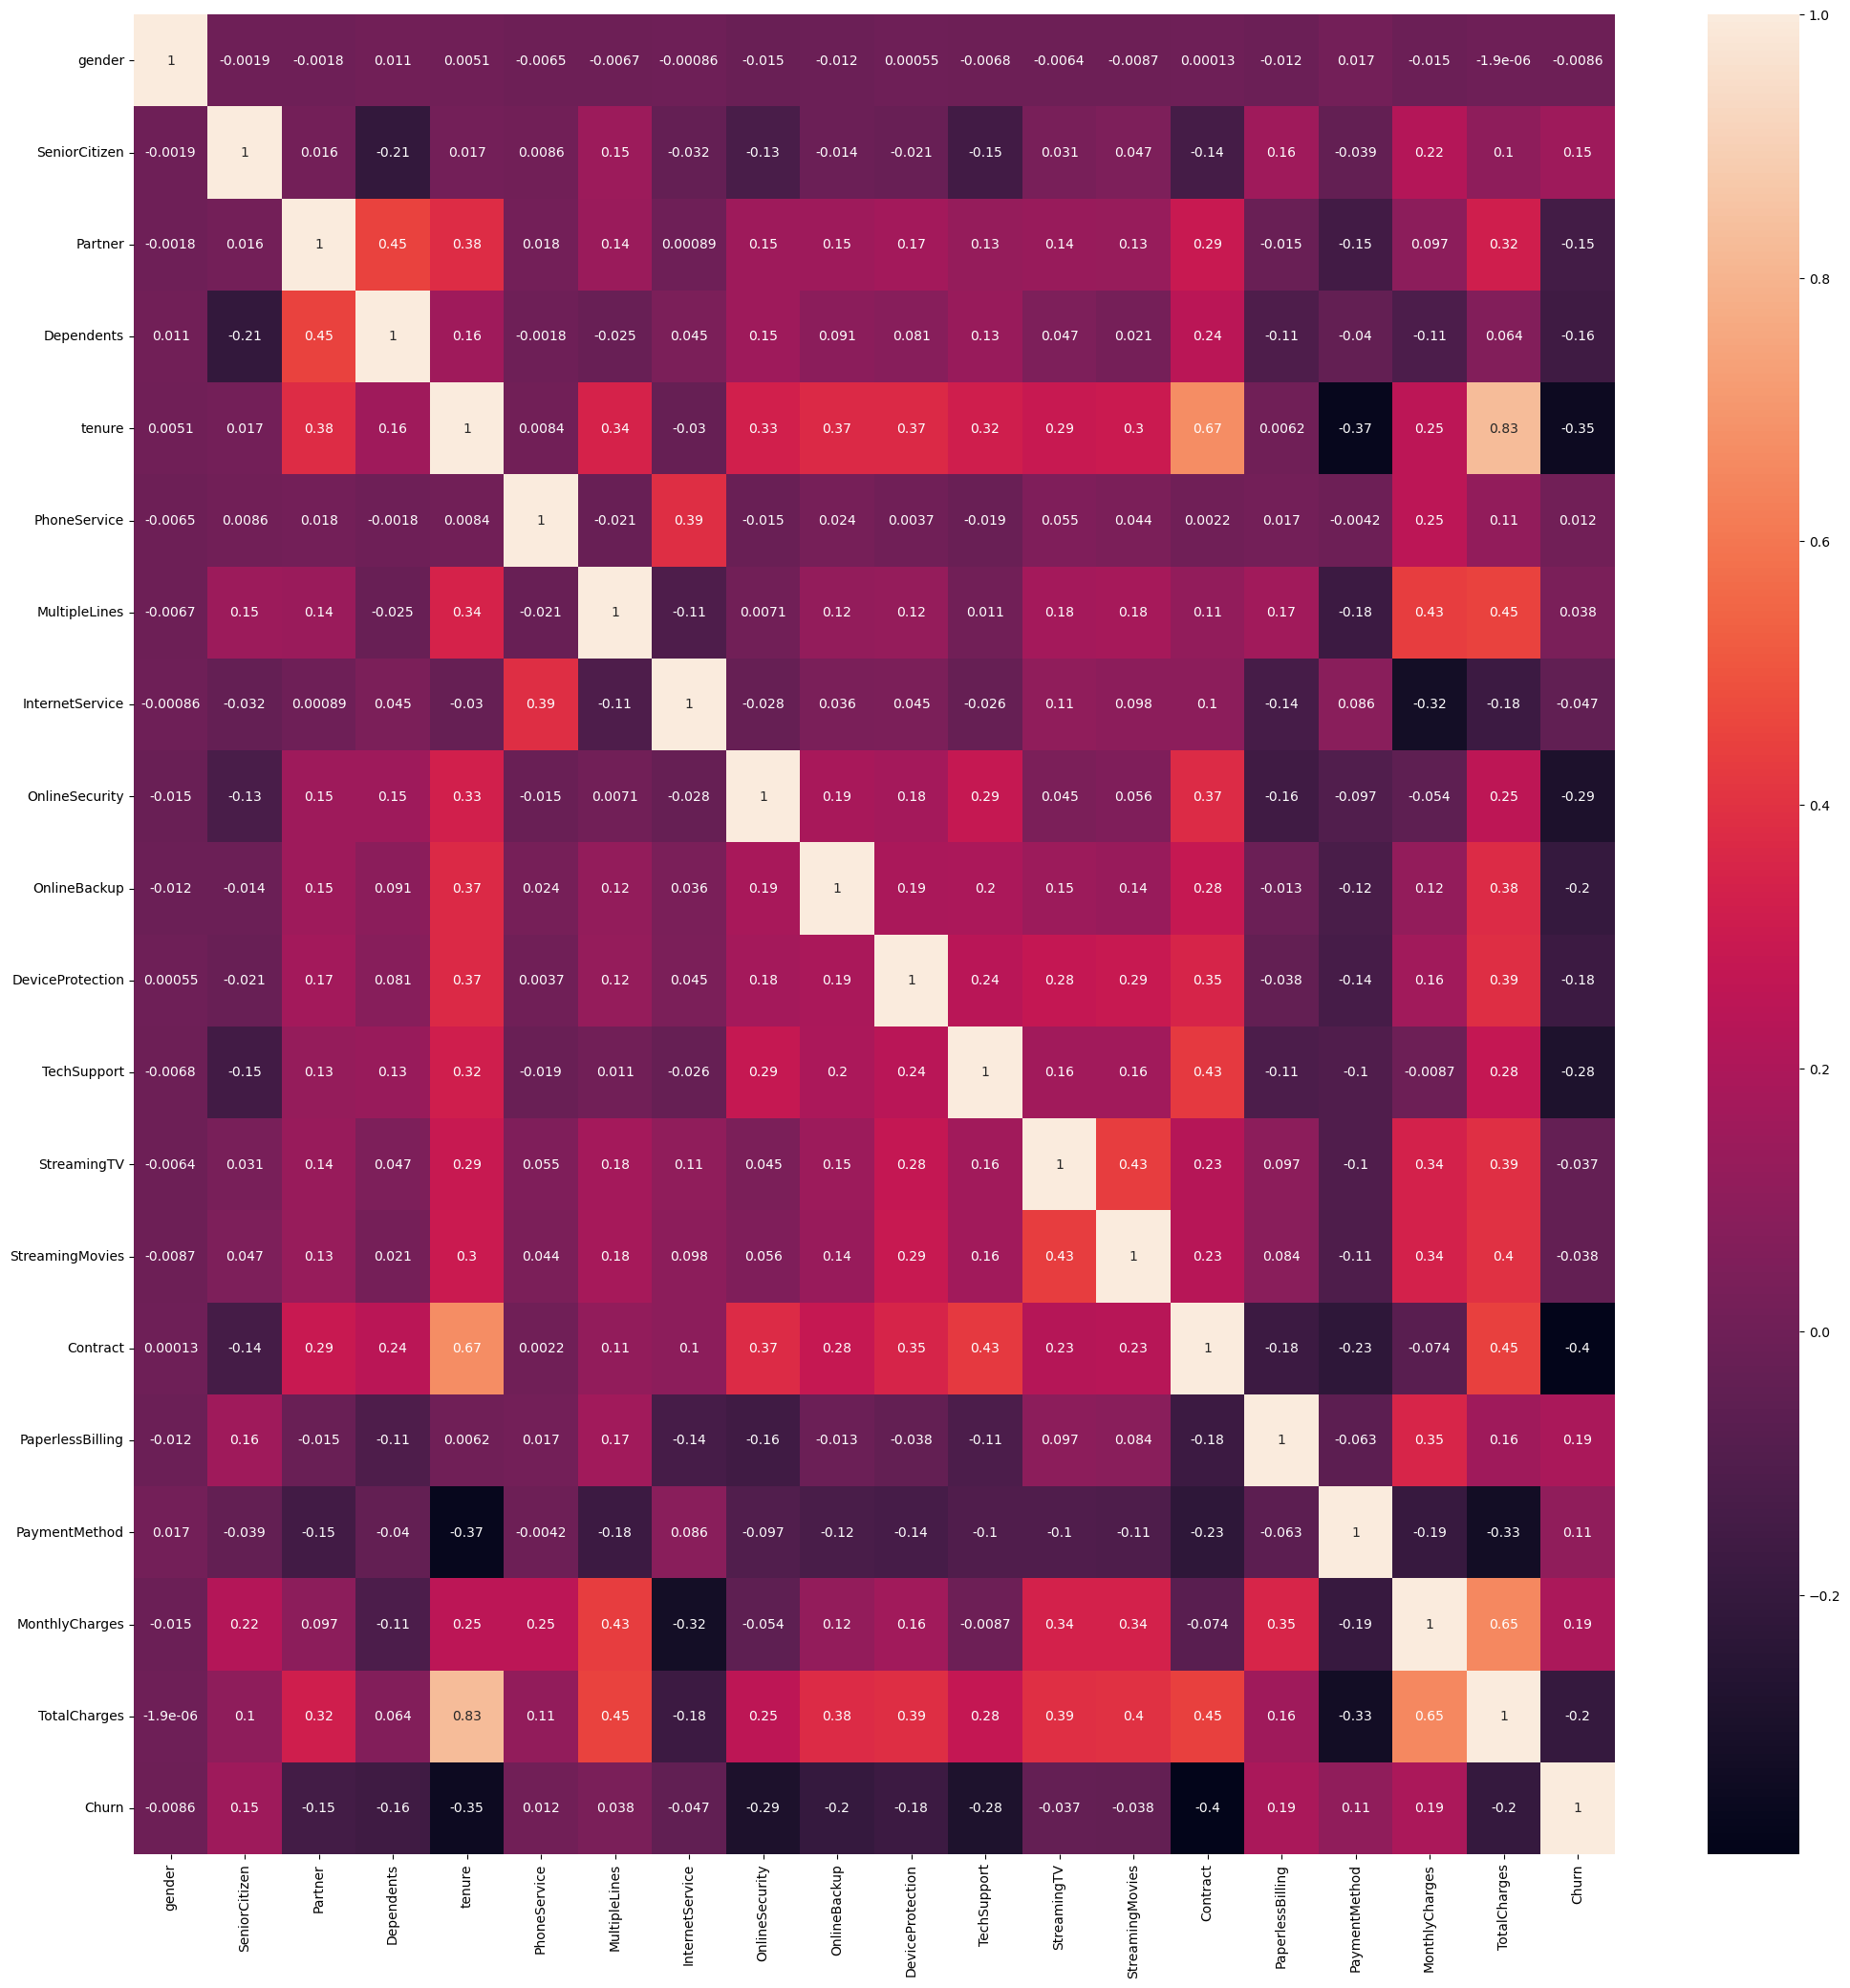

In [43]:
plt.figure(figsize=(25,25))

# CORRELATION
sns.heatmap(train_df.corr(),annot=True)
plt.show()

In [44]:
# Checking for Null Values
train_df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [45]:
#spliting independent and dependent variable
y=train_df['Churn'].values
X=train_df.drop('Churn',axis=1)

In [46]:
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60


In [47]:
y

array([0, 0, 1, ..., 0, 1, 0])

In [48]:
#Scaling and Transforming
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_df = scaler.fit_transform(X)

In [49]:
train_df

array([[0.        , 0.        , 1.        , ..., 0.66666667, 0.11542289,
        0.0012751 ],
       [1.        , 0.        , 0.        , ..., 1.        , 0.38507463,
        0.21586661],
       [1.        , 0.        , 0.        , ..., 1.        , 0.35422886,
        0.01031041],
       ...,
       [0.        , 0.        , 1.        , ..., 0.66666667, 0.11293532,
        0.03780868],
       [1.        , 1.        , 1.        , ..., 1.        , 0.55870647,
        0.03321025],
       [1.        , 0.        , 0.        , ..., 0.        , 0.86965174,
        0.78764136]])

In [50]:
# Read the csv file
test_df= pd.read_csv('test.csv')
test_df.head(20)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Male,0,No,No,25,Yes,No,Fiber optic,Yes,no,yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,106.00,2787.00
1,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,30.00,30.00
2,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
3,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
4,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
5,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
6,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
7,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
8,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
9,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50


In [51]:
test_df.shape

(20, 19)

In [52]:
test_df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,20.0,20.000000,20.000000,20.000000
mean,0.0,21.400000,65.662500,1680.355000
std,0.0,19.701456,32.801412,1737.730413
min,0.0,1.000000,18.950000,29.850000
25%,0.0,2.000000,29.962500,140.775000
50%,0.0,19.000000,56.550000,1330.625000
75%,0.0,29.500000,101.187500,2787.000000
max,0.0,62.000000,106.000000,5681.100000


In [53]:
test_df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
dtype: object

In [54]:
# Total charge is an object type so converting it into numeric form

test_df['TotalCharges'] = pd.to_numeric(test_df['TotalCharges'], errors='coerce')


In [55]:
# check the data type of the column after conversion
print(test_df['TotalCharges'].dtype)

float64


In [56]:
test_df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [57]:
#Performing Label encoder
from sklearn.preprocessing import LabelEncoder

# List of categorical columns
cat_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

# Apply LabelEncoder to each column
for col in cat_cols:
    test_df[col] = LabelEncoder().fit_transform(test_df[col])


In [59]:
test_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1,0,0,0,25,1,0,1,2,3,3,2,2,2,0,1,2,106.00,2787.00
1,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,30.00,30.00
2,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
3,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
4,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
5,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
6,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
7,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
8,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65
9,0,0,0,0,8,1,2,1,0,0,2,0,2,2,0,1,2,99.65,820.50


In [62]:
required_cols = ['gender','SeniorCitizen','Partner','Dependents','tenure','PhoneService','MultipleLines','InternetService',
                 'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
                'Contract','PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges']   

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
required_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges']

In [66]:
train_df.shape

(7043, 19)

In [67]:
test_df.shape

(20, 19)

In [68]:
train_df

array([[0.        , 0.        , 1.        , ..., 0.66666667, 0.11542289,
        0.0012751 ],
       [1.        , 0.        , 0.        , ..., 1.        , 0.38507463,
        0.21586661],
       [1.        , 0.        , 0.        , ..., 1.        , 0.35422886,
        0.01031041],
       ...,
       [0.        , 0.        , 1.        , ..., 0.66666667, 0.11293532,
        0.03780868],
       [1.        , 1.        , 1.        , ..., 1.        , 0.55870647,
        0.03321025],
       [1.        , 0.        , 0.        , ..., 0.        , 0.86965174,
        0.78764136]])

In [69]:
test_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1,0,0,0,25,1,0,1,2,3,3,2,2,2,0,1,2,106.00,2787.00
1,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,30.00,30.00
2,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
3,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
4,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
5,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
6,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
7,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
8,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65
9,0,0,0,0,8,1,2,1,0,0,2,0,2,2,0,1,2,99.65,820.50


In [70]:
#Logistic Regression model 
model=LogisticRegression()
model.fit(train_df,y)
final=model.predict(test_df)

output=pd.DataFrame(final)
output[0].value_counts()

1    20
Name: 0, dtype: int64

In [71]:
print(train_df.shape)   # should print (n_samples, n_features)
print(y.shape)          # should print (n_samples,)


(7043, 19)
(7043,)


In [72]:
from sklearn import metrics
prediction_test = model.predict(test_df)
# Print the prediction accuracy
print (metrics.accuracy_score(output, prediction_test))

1.0


In [75]:
#Splitting the data to train and test using sklearn train_test_split module
X_train, X_test, y_train, y_test = train_test_split(train_df,y, test_size=0.2,random_state= 42)

In [76]:
# from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.fit_transform(X_test)

In [77]:
#Fitting model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred =lr_model.predict(X_test)

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import cross_val_predict


# Create the model
model = LogisticRegression()

# Fit the model using cross-validation
scores = cross_val_score(model, X_train, y_train, cv=5)

# Print the accuracy score
print("Accuracy:", scores.mean())

# Print other performance metrics
predicted_output = cross_val_predict(model,X_train, y_train, cv=5)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("Confusion Matrix:")
print(confusion_matrix)


Accuracy: 0.7980121386727523
Precision: 0.6792452830188679
Recall: 0.579088471849866
F1 Score: 0.6251808972503617
Confusion Matrix:
[[934 102]
 [157 216]]


In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create the model
model = LogisticRegression()

# Define the parameter grid to search
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# Perform the grid search
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
Best Score: 0.7987229334547936


In [85]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver': ['liblinear', 'saga']
}

# Create the model
model = LogisticRegression()

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Use the best estimator to predict the output
y_pred = grid_search.best_estimator_.predict(X_test)

# Calculate all the performance metrics
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("Confusion Matrix:")
print(confusion_matrix)


Best Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
Best Score: 0.7987229334547936
Precision: 0.6925675675675675
Recall: 0.5495978552278821
F1 Score: 0.6128550074738416
Confusion Matrix:
[[945  91]
 [168 205]]


In [79]:
from sklearn.tree import DecisionTreeClassifier

# Create the model
model = DecisionTreeClassifier()

# Fit the model using cross-validation
scores = cross_val_score(model, X_train, y_train, cv=5)

# Print the accuracy score
print("Accuracy:", scores.mean())

# Print other performance metrics
predicted_output = cross_val_predict(model,X_train, y_train, cv=5)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("Confusion Matrix:")
print(confusion_matrix)

Accuracy: 0.7305619691694735
Precision: 0.6792452830188679
Recall: 0.579088471849866
F1 Score: 0.6251808972503617
Confusion Matrix:
[[934 102]
 [157 216]]


In [82]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Create the model
model = DecisionTreeClassifier()

# Define the parameter grid to search over
param_grid = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15]
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

# Use the best hyperparameters to create a new model
best_model = DecisionTreeClassifier(max_depth=grid_search.best_params_['max_depth'],
                                     min_samples_split=grid_search.best_params_['min_samples_split'])

# Fit the new model using cross-validation
scores = cross_val_score(best_model, X_train, y_train, cv=5)

# Print the accuracy score
print("Accuracy:", scores.mean())

# Print other performance metrics
predicted_output = cross_val_predict(best_model, X_train, y_train, cv=5)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("Confusion Matrix:")
print(confusion_matrix)


Best hyperparameters:  {'max_depth': 5, 'min_samples_split': 2}
Accuracy: 0.7898472973249845
Precision: 0.4830287206266319
Recall: 0.4959785522788204
F1 Score: 0.4894179894179895
Confusion Matrix:
[[838 198]
 [188 185]]


In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import cross_val_predict

# Create the model
model = RandomForestClassifier()

# Fit the model using cross-validation
scores = cross_val_score(model, X_train, y_train, cv=5)

# Print the accuracy score
print("Accuracy:", scores.mean())

# Print other performance metrics
predicted_output = cross_val_predict(model, X_train, y_train, cv=5)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("Confusion Matrix:")
print(confusion_matrix)


Accuracy: 0.7878934784972758
Precision: 0.6925675675675675
Recall: 0.5495978552278821
F1 Score: 0.6128550074738416
Confusion Matrix:
[[945  91]
 [168 205]]


In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Create the model
model = RandomForestClassifier()

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

# Use the best hyperparameters to create a new model
best_model = RandomForestClassifier(n_estimators=grid_search.best_params_['n_estimators'],
                                     max_depth=grid_search.best_params_['max_depth'],
                                     min_samples_split=grid_search.best_params_['min_samples_split'],
                                     min_samples_leaf=grid_search.best_params_['min_samples_leaf'])

# Fit the new model using cross-validation
scores = cross_val_score(best_model, X_train, y_train, cv=5)

# Print the accuracy score
print("Accuracy:", scores.mean())

# Print other performance metrics
predicted_output = cross_val_predict(best_model, X_train, y_train, cv=5)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("Confusion Matrix:")
print(confusion_matrix)


Best hyperparameters:  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Accuracy: 0.800141213331421
Precision: 0.4830287206266319
Recall: 0.4959785522788204
F1 Score: 0.4894179894179895
Confusion Matrix:
[[838 198]
 [188 185]]


In [80]:
# from sklearn.metrics import classification_report
from sklearn.metrics import classification_report
df = DecisionTreeClassifier(random_state=0)
df.fit(X_train , y_train)
print(df.score(X_train , y_train))
print(df.score(X_test , y_test))
y_pred = df.predict(X_test)
print(classification_report(y_test,y_pred))

0.9985800496982605
0.7260468417317246
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1036
           1       0.48      0.50      0.49       373

    accuracy                           0.73      1409
   macro avg       0.65      0.65      0.65      1409
weighted avg       0.73      0.73      0.73      1409



In [81]:
#Exporting model using pickle
import pickle

# filename = 'model.pkl'
# pickle.dump(LogisticRegression(), open(filename, 'wb'))

filename = 'trained1_model.pkl'
pickle.dump(lr_model, open(filename, 'wb'))

loaded_model = pickle.load(open('trained1_model.pkl', 'rb'))

